In [12]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pandas as pd
import pickle

import bacco
import baccoemu

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import utils
import plotter
# import data_creation_pipeline as dcp
# import compute_biased_pks_fields as cpk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
idx_LH_str = '0663'
sim_name_quijote = f'quijote_LH{idx_LH_str}'

dir_data = '/cosmos_storage/home/mpelle/Yin_data/Quijote'
fn_params = f'{dir_data}/LH{idx_LH_str}/param_{idx_LH_str}.txt'
param_vals = np.loadtxt(fn_params)
param_names = ['omega_m', 'omega_baryon', 'h', 'n_s', 'sigma_8']
param_dict = dict(zip(param_names, param_vals))
cosmo_quijote = utils.get_cosmo(param_dict)

Param tau not in param dict, adding quijote value
Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value


In [14]:
cosmo_quijote.pars

{'hubble': 0.7015,
 'sigma8': 0.8311,
 'A_s': None,
 'omega_baryon': 0.04625,
 'omega_cdm': 0.27604999999999996,
 'w0': -1.0,
 'wa': 0.0,
 'ns': 0.9607,
 'tau': 0.0561,
 'approx_nu': False,
 'num_massive_neutrinos': 0,
 'neutrino_mass': 0.0,
 'Neffective': 3.046,
 'DeltaNeff': 3.046,
 'GammaNu': 0.71611,
 'omega_neutrino': 0.0,
 'omega_matter': 0.3223,
 'omega_cold': 0.3223,
 'photon_temperature': 2.7255,
 'omega_photons': 0.0,
 'omega_rad': 0.0,
 'omega_de': 0.6777,
 'omega_k': 0.0,
 'omega_tot': 1.0}

In [15]:
param_dict_taufix = param_dict.copy()
param_dict_taufix['tau'] = 0.0952
cosmo_quijote_taufix = utils.get_cosmo(param_dict_taufix)

Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value


In [16]:
cosmo_quijote_taufix.pars

{'hubble': 0.7015,
 'sigma8': 0.8311,
 'A_s': None,
 'omega_baryon': 0.04625,
 'omega_cdm': 0.27604999999999996,
 'w0': -1.0,
 'wa': 0.0,
 'ns': 0.9607,
 'tau': 0.0952,
 'approx_nu': False,
 'num_massive_neutrinos': 0,
 'neutrino_mass': 0.0,
 'Neffective': 3.046,
 'DeltaNeff': 3.046,
 'GammaNu': 0.71611,
 'omega_neutrino': 0.0,
 'omega_matter': 0.3223,
 'omega_cold': 0.3223,
 'photon_temperature': 2.7255,
 'omega_photons': 0.0,
 'omega_rad': 0.0,
 'omega_de': 0.6777,
 'omega_k': 0.0,
 'omega_tot': 1.0}

In [17]:
box_size = 1000.
n_grid = 512

In [18]:
ngenic_phases = True
phase_type = 1

seed = int(idx_LH_str)
expfactor = 1.0
FixedInitialAmplitude = False

sim, disp_fromlpt = bacco.utils.create_lpt_simulation(cosmo_quijote, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor, LPT_order=2, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-22 18:43:49,690 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:43:49,691 bacco.sims : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:43:49,692 bacco.sims : Initialising simulation Default
2024-08-22 18:43:49,693 bacco.sims : ...done in 0.00169 s


bacco.lss_scaler : 293 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table
bacco.lss_scaler: Computing 2LPT density...
l2=7.78209e-18 
l2=6.73432e-17 
l2=-3.85992e-17 
l2=-3.25662e-18 
l2=-4.83533e-17 
l2=-1.04121e-16 
bacco.lss_scaler: Fourier transforming second order source...
l2=-2.14211e-08 l3a=3.105e-08 l3b=4.34859e-08


2024-08-22 18:44:13,035 bacco.scaler : Adding displacement field with a vel-factor=53.391221


bacco.lss_scaler:  Adding LSS displacement: vel_factor=53.391221 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [19]:
ngenic_phases = False
phase_type = None

seed = int(idx_LH_str)
expfactor = 1.0
FixedInitialAmplitude = False

sim_checkngenic, disp_fromlpt_checkngenic = bacco.utils.create_lpt_simulation(cosmo_quijote, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor, LPT_order=2, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-22 18:44:16,756 bacco.util : Setting ngenic_phases=False overruns provided value of phase_type. This will generate a Gadget-3 compatible phase field without Ngenic
2024-08-22 18:44:16,758 bacco.sims : Setting ngenic_phases=False overruns provided value of phase_type. This will generate a Gadget-3 compatible phase field without Ngenic
2024-08-22 18:44:16,758 bacco.sims : Initialising simulation Default
2024-08-22 18:44:16,759 bacco.sims : ...done in 0.00172 s


bacco.lss_scaler : 293 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=0; precision=single 
bacco.lss: computing seed table
bacco.lss_scaler: Computing 2LPT density...
l2=7.78209e-18 
l2=6.73432e-17 
l2=-3.85992e-17 
l2=-3.25662e-18 
l2=-4.83533e-17 
l2=-1.04182e-16 
bacco.lss_scaler: Fourier transforming second order source...
l2=-2.14218e-08 l3a=3.10621e-08 l3b=4.35151e-08


2024-08-22 18:44:39,839 bacco.scaler : Adding displacement field with a vel-factor=53.391221


bacco.lss_scaler:  Adding LSS displacement: vel_factor=53.391221 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [20]:
np.allclose(disp_fromlpt, disp_fromlpt_checkngenic)

False

In [21]:
dens_lin_fromlpt = sim.get_linear_field(ngrid=n_grid, quantity='delta')

bacco.lss_scaler : 293 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


In [22]:
ngenic_phases = True
phase_type = 1

seed = int(idx_LH_str)
expfactor = 1.0
FixedInitialAmplitude = False

sim_1lpt, disp_fromlpt_1lpt = bacco.utils.create_lpt_simulation(cosmo_quijote, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor, LPT_order=1, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-22 18:44:53,227 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:44:53,229 bacco.sims : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:44:53,230 bacco.sims : Initialising simulation Default
2024-08-22 18:44:53,231 bacco.sims : ...done in 0.00178 s


bacco.lss_scaler : 293 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


2024-08-22 18:45:05,568 bacco.scaler : Adding displacement field with a vel-factor=53.391221


bacco.lss_scaler:  Adding LSS displacement: vel_factor=53.391221 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [23]:
dens_lin_fromlpt_1lpt = sim_1lpt.get_linear_field(ngrid=n_grid, quantity='delta')

bacco.lss_scaler : 293 P(k) values; Di = (1.000000, 1.000000, 1.000000, 1.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


### Try with the lagrangian indices

In [24]:
idx_LH = '663'
fn_lag_index = f"/cosmos_storage/data_sharing/quijote_{idx_LH}_neighfile.pickle"
with open(fn_lag_index, 'rb') as f:
    lag_index = pickle.load(f)
print(lag_index.shape)

(134217728,)


In [25]:
idx_LH = '663'
fn_lag_index_ics = f"/cosmos_storage/data_sharing/quijote_ics_{idx_LH}_neighfile.pickle"
with open(fn_lag_index_ics, 'rb') as f:
    lag_index_ics = pickle.load(f)
print(lag_index_ics.shape)

(134217728,)


In [26]:
# putting lag_index as indices here doesn't do anything
bmodel = bacco.BiasModel(sim=None, linear_delta=dens_lin_fromlpt, ngrid=n_grid, ngrid1=None,
                        sdm=False, mode="dm", # these are the defaults - but do we need to change for bacco?
                        BoxSize=box_size,
                        npart_for_fake_sim=n_grid, #damping_scale=damping_scale,
                        bias_model='expansion', deposit_method="cic",
                        use_displacement_of_nn=False, interlacing=False,
                        )

2024-08-22 18:45:15,626 bacco.BiasModel : Initialising Bias Model class ...


In [27]:
lin_field = bmodel.linear_field

2024-08-22 18:45:18,956 bacco.BiasModel : Computing linear field ...
2024-08-22 18:45:18,958 bacco.BiasModel : Memory used: 23.619715072 Gigabytes


### Get pos various ways

In [28]:
fn_disp = f'{dir_data}/LH{idx_LH_str}/dis_{idx_LH_str}.npy'
disp = np.load(fn_disp) # sim
n_grid = disp.shape[-1]

grid = bacco.visualization.uniform_grid(npix=n_grid, L=box_size, ndim=3, bounds=False)

pos = bacco.scaler.add_displacement(None,
                                disp,
                                box=box_size,
                                pos=grid.reshape(-1,3),
                                vel=None,
                                vel_factor=0,
                                verbose=False)[0]

In [29]:
import readgadget

snapshot = '/dipc/kstoreyf/Quijote_simulations/Snapshots/latin_hypercube/663/snapdir_004/snap_004'
ptype    = [1] #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)

# read positions, velocities and IDs of the particles
pos_raw = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h
ids = readgadget.read_block(snapshot, "ID  ", ptype)-1   #IDs starting from 0

In [30]:
# ics
snapshot_ics = '/dipc/kstoreyf/Quijote_simulations/Snapshots/latin_hypercube/663/ICs/ics'
ids_ics = readgadget.read_block(snapshot_ics, "ID  ", ptype)-1   #IDs starting from 0
pos_raword = pos_raw[ids_ics]

In [31]:
pos_raw_lagind = pos_raw[lag_index]

In [32]:
bias_term_eul_delta = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos, 
                                #mass = (bias_fields_lagind[1]).flatten(), 
                                mass = lin_field.flatten(),
                                deposit_method='cic', 
                                interlacing=False)

2024-08-22 18:45:56,709 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-22 18:45:57,161 bacco.statistics : starting deposit 1
2024-08-22 18:45:58,092 bacco.statistics :  mesh done in 1.38 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


In [33]:
bias_term_eul_delta_raw_lagind = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, 
                                                               pos=pos_raw_lagind, 
                                                                mass = lin_field.flatten(), 
                                                                deposit_method='cic', 
                                                                interlacing=False)

2024-08-22 18:46:00,347 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-22 18:46:00,766 bacco.statistics : starting deposit 1
2024-08-22 18:46:01,632 bacco.statistics :  mesh done in 1.29 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (134217728 with mass)


### Measure Pks

In [34]:
norm=n_grid**3
normalise_grid = False
deconvolve_grid = True
k_min = 0.01
k_max = 0.68
n_bins = 30
log_binning = True
correct_grid = True

args_power = {
                'interlacing':False,
                'kmin':k_min,
                'kmax':k_max,
                'nbins':n_bins,
                'log_binning':log_binning,
                'deposit_method':'cic',
                'correct_grid': correct_grid,
                'compute_correlation':False,
                'zspace':False, #we include the velocities before
                'compute_power2d':False}

In [35]:
pairs = [[dens_lin_fromlpt, dens_lin_fromlpt], 
         [bias_term_eul_delta, bias_term_eul_delta],
         [dens_lin_fromlpt, bias_term_eul_delta]]
pk_objs_lagind = []
for pair in pairs:
    pk_obj = bacco.statistics.compute_crossspectrum_twogrids(
                            grid1=pair[0]/norm,
                            grid2=pair[1]/norm,
                            cosmology=cosmo_quijote,
                            ngrid=n_grid,
                            box=box_size,
                            normalise_grid1=normalise_grid,
                            normalise_grid2=normalise_grid,
                            deconvolve_grid1=deconvolve_grid,
                            deconvolve_grid2=deconvolve_grid,
                            **args_power)
    pk_objs_lagind.append(pk_obj)

2024-08-22 18:46:05,372 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.53064e-11 (grid1) 1.53064e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.529934 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.324162 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000169 secs
bacco.power : Deallocating arrays


2024-08-22 18:46:12,968 bacco.statistics :  ...done in 7.6 s
2024-08-22 18:46:14,867 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 2.3925e-10 (grid1) 2.3925e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.473622 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.324966 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000451 secs
bacco.power : Deallocating arrays


2024-08-22 18:46:21,315 bacco.statistics :  ...done in 6.45 s
2024-08-22 18:46:23,135 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.53064e-11 (grid1) 2.3925e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.462381 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.340286 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000320 secs
bacco.power : Deallocating arrays


2024-08-22 18:46:29,575 bacco.statistics :  ...done in 6.44 s


/tmp/ipykernel_184878/3603953305.py:10: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])


(-0.15, 0.15)

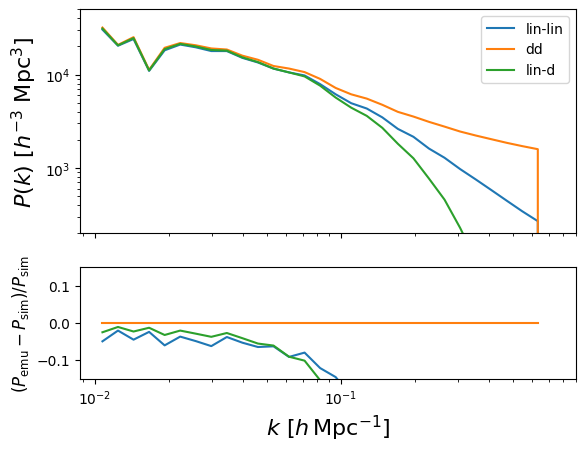

In [36]:
labels = ['lin-lin', 'dd', 'lin-d']
i_fid = 1

pk_objs = pk_objs_lagind

fig, axarr = plt.subplots(2, 1, sharex=True, height_ratios=[2, 1])
ax, ax1 = axarr
for i, pk_obj in enumerate(pk_objs):
    ax.plot(pk_obj['k'], pk_obj['pk'], label=labels[i])
    ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])      
ax.set_xscale('log')
ax.set_yscale('log')


axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)

ax.legend()
ax.set_ylim(2e2, 5e4)
ax1.set_ylim(-0.15, 0.15)

In [37]:
pairs = [[dens_lin_fromlpt, dens_lin_fromlpt], 
         [bias_term_eul_delta_raw_lagind, bias_term_eul_delta_raw_lagind],
         [dens_lin_fromlpt, bias_term_eul_delta_raw_lagind]]
pk_objs_raw_lagind = []
for pair in pairs:
    pk_obj = bacco.statistics.compute_crossspectrum_twogrids(
                            grid1=pair[0]/norm,
                            grid2=pair[1]/norm,
                            cosmology=cosmo_quijote,
                            ngrid=n_grid,
                            box=box_size,
                            normalise_grid1=normalise_grid,
                            normalise_grid2=normalise_grid,
                            deconvolve_grid1=deconvolve_grid,
                            deconvolve_grid2=deconvolve_grid,
                            **args_power)
    pk_objs_raw_lagind.append(pk_obj)

2024-08-22 18:46:34,569 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.53064e-11 (grid1) 1.53064e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.540482 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.335058 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000327 secs
bacco.power : Deallocating arrays


2024-08-22 18:46:41,909 bacco.statistics :  ...done in 7.34 s
2024-08-22 18:46:43,834 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 3.84734e-10 (grid1) 3.84734e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.430939 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.378233 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000282 secs
bacco.power : Deallocating arrays


2024-08-22 18:46:50,547 bacco.statistics :  ...done in 6.71 s
2024-08-22 18:46:52,453 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.53064e-11 (grid1) 3.84734e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.331549 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.416142 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000320 secs
bacco.power : Deallocating arrays


2024-08-22 18:46:58,776 bacco.statistics :  ...done in 6.32 s


/tmp/ipykernel_184878/3212884568.py:10: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])


(-0.15, 0.15)

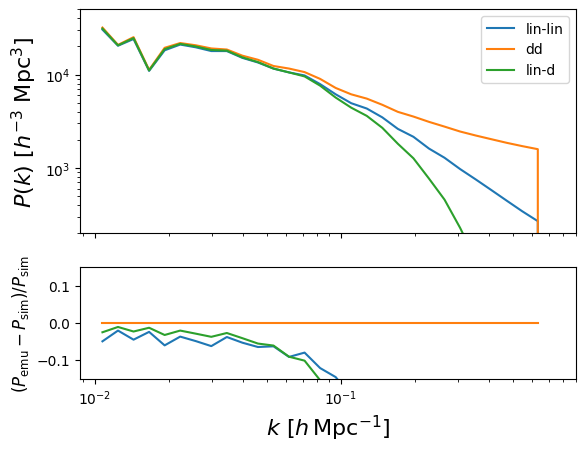

In [38]:
labels = ['lin-lin', 'dd', 'lin-d']
i_fid = 1

pk_objs = pk_objs_raw_lagind

fig, axarr = plt.subplots(2, 1, sharex=True, height_ratios=[2, 1])
ax, ax1 = axarr
for i, pk_obj in enumerate(pk_objs):
    ax.plot(pk_obj['k'], pk_obj['pk'], label=labels[i])
    ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])      
ax.set_xscale('log')
ax.set_yscale('log')


axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)

ax.legend()
ax.set_ylim(2e2, 5e4)
ax1.set_ylim(-0.15, 0.15)

In [39]:
pairs = [[dens_lin_fromlpt_1lpt, dens_lin_fromlpt_1lpt], 
         [bias_term_eul_delta_raw_lagind, bias_term_eul_delta_raw_lagind],
         [dens_lin_fromlpt_1lpt, bias_term_eul_delta_raw_lagind]]
pk_objs_raw_lagind_1lpt = []
for pair in pairs:
    pk_obj = bacco.statistics.compute_crossspectrum_twogrids(
                            grid1=pair[0]/norm,
                            grid2=pair[1]/norm,
                            cosmology=cosmo_quijote,
                            ngrid=n_grid,
                            box=box_size,
                            normalise_grid1=normalise_grid,
                            normalise_grid2=normalise_grid,
                            deconvolve_grid1=deconvolve_grid,
                            deconvolve_grid2=deconvolve_grid,
                            **args_power)
    pk_objs_raw_lagind_1lpt.append(pk_obj)

2024-08-22 18:47:03,953 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.53064e-11 (grid1) 1.53064e-11 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.529103 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.359379 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000385 secs
bacco.power : Deallocating arrays


2024-08-22 18:47:11,022 bacco.statistics :  ...done in 7.07 s
2024-08-22 18:47:12,847 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 3.84734e-10 (grid1) 3.84734e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.509166 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.397581 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000577 secs
bacco.power : Deallocating arrays


2024-08-22 18:47:19,436 bacco.statistics :  ...done in 6.59 s
2024-08-22 18:47:21,239 bacco.statistics : Computing the power spectrum with ngrid=512 and interlacing=False


bacco.power : boxsize 1000.000000; ngrid 512; nthreads 48; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=1 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=1 deconvolve_grid2=1
bacco.power : total mass 1.53064e-11 (grid1) 3.84734e-10 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.571318 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.383299 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000155 secs
bacco.power : Deallocating arrays


2024-08-22 18:47:27,905 bacco.statistics :  ...done in 6.67 s


/tmp/ipykernel_184878/3527254303.py:10: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])


(-0.15, 0.15)

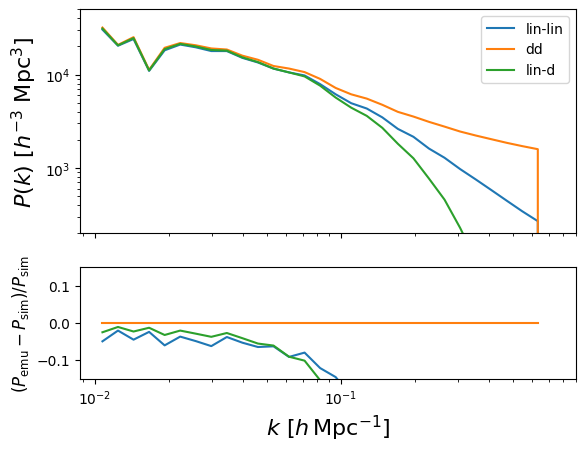

In [40]:
labels = ['lin-lin', 'dd', 'lin-d']
i_fid = 1

pk_objs = pk_objs_raw_lagind_1lpt

fig, axarr = plt.subplots(2, 1, sharex=True, height_ratios=[2, 1])
ax, ax1 = axarr
for i, pk_obj in enumerate(pk_objs):
    ax.plot(pk_obj['k'], pk_obj['pk'], label=labels[i])
    ax1.plot(pk_obj['k'], (pk_obj['pk']-pk_objs[i_fid]['pk'])/pk_objs[i_fid]['pk'])      
ax.set_xscale('log')
ax.set_yscale('log')


axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
ax1.set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)

ax.legend()
ax.set_ylim(2e2, 5e4)
ax1.set_ylim(-0.15, 0.15)

### Check plots

In [41]:
n_grid = 512
pos_mesh = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos, 
                                         deposit_method='cic', interlacing=False)
pos_mesh = np.squeeze(pos_mesh)

2024-08-22 18:47:31,855 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-22 18:47:31,857 bacco.statistics : starting deposit 1


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


2024-08-22 18:47:32,990 bacco.statistics :  mesh done in 1.13 s


In [42]:
n_grid = 512
pos_mesh_raw = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_raw, 
                                         deposit_method='cic', interlacing=False)
pos_mesh_raw = np.squeeze(pos_mesh_raw)

2024-08-22 18:47:34,416 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-22 18:47:34,417 bacco.statistics : starting deposit 1


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb


2024-08-22 18:47:35,280 bacco.statistics :  mesh done in 0.864 s


bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


In [43]:
n_grid = 512
pos_mesh_raword = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_raword, 
                                         deposit_method='cic', interlacing=False)
pos_mesh_raword = np.squeeze(pos_mesh_raword)

2024-08-22 18:47:36,843 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-22 18:47:36,844 bacco.statistics : starting deposit 1
2024-08-22 18:47:38,025 bacco.statistics :  mesh done in 1.18 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


0.0 1313.9642
0.0 1313.9642
(512, 512, 512)
(512, 512)


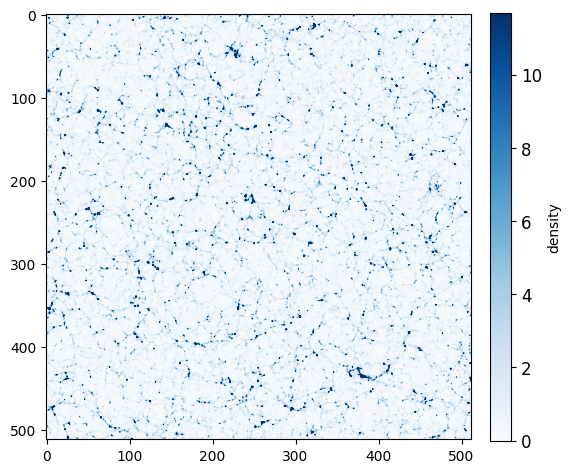

In [44]:
plotter.plot_field(pos_mesh, overdensity=False)

0.0 1313.9601
0.0 1313.9601
(512, 512, 512)
(512, 512)


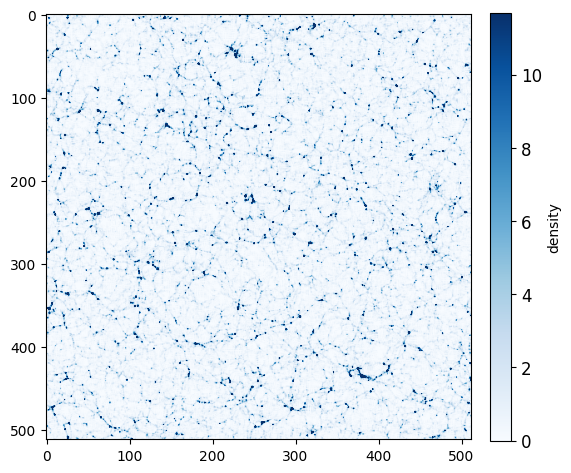

In [45]:
plotter.plot_field(pos_mesh_raw, overdensity=False)

0.0 1313.9618
0.0 1313.9618
(512, 512, 512)
(512, 512)


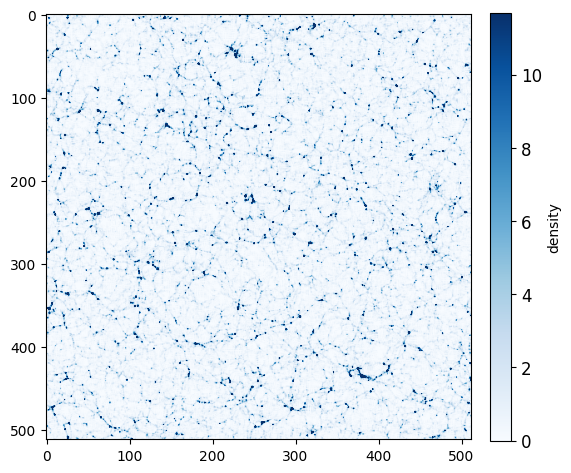

In [46]:
plotter.plot_field(pos_mesh_raword, overdensity=False)

-15.751405715942383 14.583168029785156
-15.751405715942383 14.583168029785156
(512, 512, 512)
(512, 512)


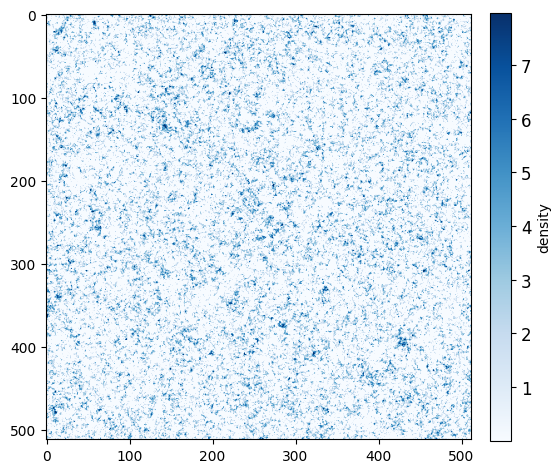

In [47]:
plotter.plot_field(dens_lin_fromlpt, overdensity=False)

-15.751405715942383 14.583168029785156
-15.751405715942383 14.583168029785156
(512, 512, 512)
(512, 512)


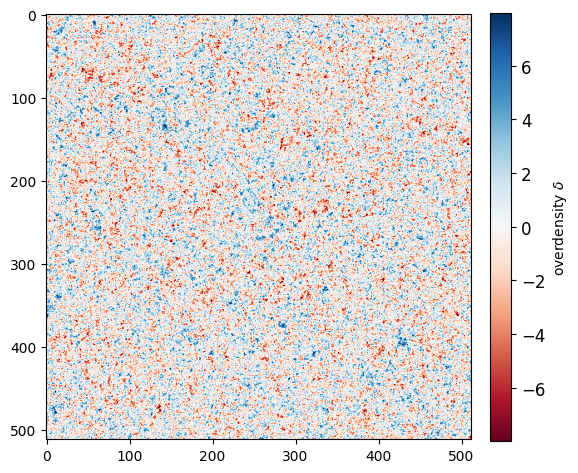

In [48]:
plotter.plot_field(lin_field, overdensity=True)

### check pos

In [49]:
diff = pos - pos_raword
diff = (diff + box_size/2) % box_size - box_size/2

In [50]:
np.min(diff), np.max(diff)

(-500.0, 500.0)

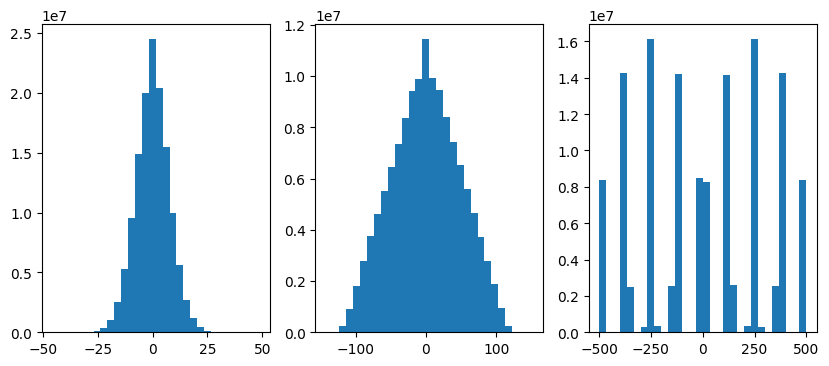

In [51]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [52]:
diff = pos - pos_raw_lagind
diff = (diff + box_size/2) % box_size - box_size/2

In [53]:
diff

array([[6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       [6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       [6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       ...,
       [0.0000000e+00, 6.1035156e-05, 6.1035156e-05],
       [6.1035156e-05, 6.1035156e-05, 0.0000000e+00],
       [6.1035156e-05, 6.1035156e-05, 6.1035156e-05]], dtype=float32)

In [54]:
np.min(diff), np.max(diff)

(-3.0517578e-05, 6.1035156e-05)

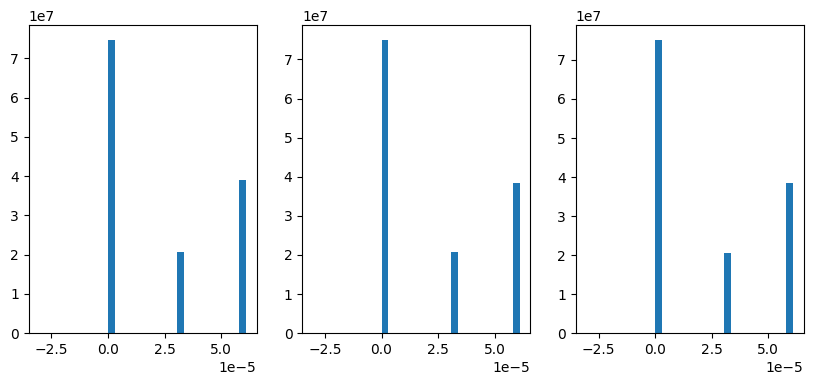

In [55]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [56]:
diff = pos_raw - pos_raw_lagind
diff = (diff + box_size/2) % box_size - box_size/2

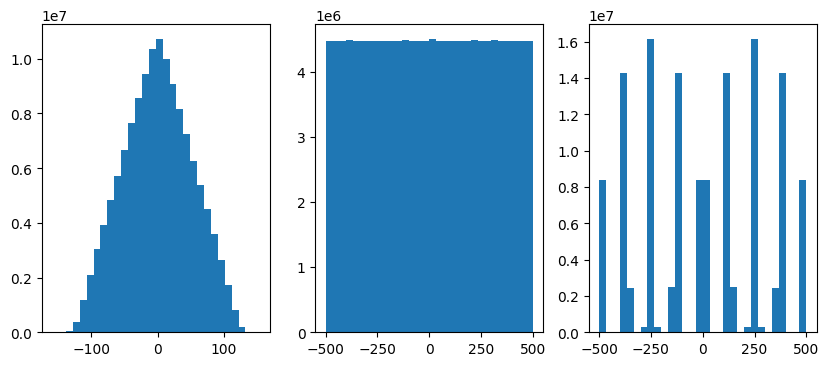

In [57]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

## Check ICs

#### From lpt

In [58]:
seed = int(idx_LH_str)
ngenic_phases = True 
phase_type = 1
z_start = 127
expfactor_start = (1/(1+z_start))
FixedInitialAmplitude = False
cosmo_quijote_start = utils.get_cosmo(param_dict, a_scale=expfactor_start)

sim_ics, disp_fromlpt_ics = bacco.utils.create_lpt_simulation(cosmo_quijote_start, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor_start, LPT_order=2, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-22 18:49:11,009 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:49:11,011 bacco.sims : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:49:11,011 bacco.sims : Initialising simulation Default
2024-08-22 18:49:11,012 bacco.sims : ...done in 0.00163 s


Param tau not in param dict, adding quijote value
Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value
bacco.lss_scaler : 293 P(k) values; Di = (0.009866, 0.000097, 0.000001, 0.000001); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table
bacco.lss_scaler: Computing 2LPT density...
l2=7.78209e-18 
l2=6.73432e-17 
l2=-3.85992e-17 
l2=-3.25662e-18 
l2=-4.83533e-17 
l2=-1.04121e-16 
bacco.lss_scaler: Fourier transforming second order source...
l2=-2.14211e-08 l3a=3.105e-08 l3b=4.34859e-08


2024-08-22 18:49:39,697 bacco.scaler : Adding displacement field with a vel-factor=642.295853


bacco.lss_scaler:  Adding LSS displacement: vel_factor=642.295853 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [59]:
grid = bacco.visualization.uniform_grid(npix=n_grid, L=box_size, ndim=3, bounds=False)

pos_ics_fromlpt = bacco.scaler.add_displacement(None,
                                disp_fromlpt_ics,
                                box=box_size,
                                pos=grid.reshape(-1,3),
                                vel=None,
                                vel_factor=0,
                                verbose=False)[0]

In [60]:
seed = int(idx_LH_str)
ngenic_phases = True 
phase_type = 1
z_start = 127
expfactor_start = (1/(1+z_start))
FixedInitialAmplitude = False
cosmo_quijote_start = utils.get_cosmo(param_dict, a_scale=expfactor_start)

sim_ics_1lpt, disp_fromlpt_ics_1lpt = bacco.utils.create_lpt_simulation(cosmo_quijote_start, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor_start, LPT_order=1, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-22 18:49:53,113 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:49:53,114 bacco.sims : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:49:53,115 bacco.sims : Initialising simulation Default
2024-08-22 18:49:53,115 bacco.sims : ...done in 0.0013 s


Param tau not in param dict, adding quijote value
Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value
bacco.lss_scaler : 293 P(k) values; Di = (0.009866, 0.000097, 0.000001, 0.000001); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


2024-08-22 18:50:07,607 bacco.scaler : Adding displacement field with a vel-factor=642.295853


bacco.lss_scaler:  Adding LSS displacement: vel_factor=642.295853 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [61]:
grid = bacco.visualization.uniform_grid(npix=n_grid, L=box_size, ndim=3, bounds=False)

pos_ics_fromlpt_1lpt = bacco.scaler.add_displacement(None,
                                disp_fromlpt_ics_1lpt,
                                box=box_size,
                                pos=grid.reshape(-1,3),
                                vel=None,
                                vel_factor=0,
                                verbose=False)[0]

In [62]:
seed = int(idx_LH_str)
ngenic_phases = True 
phase_type = 1
z_start = 127
expfactor_start = (1/(1+z_start))
FixedInitialAmplitude = False
cosmo_quijote_start_taufix = utils.get_cosmo(param_dict_taufix, a_scale=expfactor_start)

sim_ics_1lpt_taufix, disp_fromlpt_ics_1lpt_taufix = bacco.utils.create_lpt_simulation(cosmo_quijote_start_taufix, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor_start, LPT_order=1, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-22 18:50:19,880 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:50:19,881 bacco.sims : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:50:19,882 bacco.sims : Initialising simulation Default
2024-08-22 18:50:19,882 bacco.sims : ...done in 0.00126 s


Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value
bacco.lss_scaler : 293 P(k) values; Di = (0.009866, 0.000097, 0.000001, 0.000001); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


2024-08-22 18:50:34,640 bacco.scaler : Adding displacement field with a vel-factor=642.295853


bacco.lss_scaler:  Adding LSS displacement: vel_factor=642.295853 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [63]:
grid = bacco.visualization.uniform_grid(npix=n_grid, L=box_size, ndim=3, bounds=False)

pos_ics_fromlpt_1lpt_taufix = bacco.scaler.add_displacement(None,
                                disp_fromlpt_ics_1lpt_taufix,
                                box=box_size,
                                pos=grid.reshape(-1,3),
                                vel=None,
                                vel_factor=0,
                                verbose=False)[0]

In [64]:
seed = int(idx_LH_str)
ngenic_phases = True 
phase_type = 1
z_start = 127
expfactor_start = (1/(1+z_start))
FixedInitialAmplitude = False
cosmo_quijote_start = utils.get_cosmo(param_dict, a_scale=expfactor_start)

sim_ics_1lpt_damp, disp_fromlpt_ics_1lpt_damp = bacco.utils.create_lpt_simulation(cosmo_quijote_start, box_size, Nmesh=n_grid, Seed=seed,
                                                    FixedInitialAmplitude=FixedInitialAmplitude,InitialPhase=0, 
                                                    expfactor=expfactor_start, LPT_order=1, order_by_order=None,
                                                    phase_type=phase_type, ngenic_phases=ngenic_phases, return_disp=True, 
                                                    sphere_mode=0)

2024-08-22 18:50:47,358 bacco.util : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:50:47,360 bacco.sims : Initial conditions compatible with Gadget-3 Ngenic
2024-08-22 18:50:47,360 bacco.sims : Initialising simulation Default
2024-08-22 18:50:47,362 bacco.sims : ...done in 0.00194 s


Param tau not in param dict, adding quijote value
Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value
bacco.lss_scaler : 293 P(k) values; Di = (0.009866, 0.000097, 0.000001, 0.000001); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


2024-08-22 18:50:59,914 bacco.scaler : Adding displacement field with a vel-factor=642.295853


bacco.lss_scaler:  Adding LSS displacement: vel_factor=642.295853 mesh_dtype=4, use_vel=1, use_bias=0
bacco.lss_scaler:  Adding LSS displacement: looping over particles


In [65]:
np.allclose(disp_fromlpt_ics_1lpt, disp_fromlpt_ics_1lpt_damp)

True

In [66]:
grid = bacco.visualization.uniform_grid(npix=n_grid, L=box_size, ndim=3, bounds=False)

pos_ics_fromlpt_1lpt_damp = bacco.scaler.add_displacement(None,
                                disp_fromlpt_ics_1lpt_damp,
                                box=box_size,
                                pos=grid.reshape(-1,3),
                                vel=None,
                                vel_factor=0,
                                verbose=False)[0]

#### From snapshot

In [67]:
import readgadget

# input files
# snapshot = '/home/fvillaescusa/Quijote/Snapshots/h_p/snapdir_002/snap_002'
snapshot_ics = '/dipc/kstoreyf/Quijote_simulations/Snapshots/latin_hypercube/663/ICs/ics'
ptype    = [1] #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)

# read positions, velocities and IDs of the particles
pos_ics_raw = readgadget.read_block(snapshot_ics, "POS ", ptype)/1e3 #positions in Mpc/h
ids_ics = readgadget.read_block(snapshot_ics, "ID  ", ptype)-1   #IDs starting from 0

In [68]:
pos_ics_raw_lagind = pos_ics_raw[lag_index_ics]

In [69]:
pos_ics_raword_lagind = pos_ics_raw[ids_ics][lag_index]

In [70]:
np.allclose(pos_ics_fromlpt, pos_ics_raword_lagind)

False

#### Compare

In [71]:
diff = pos_ics_fromlpt - pos_ics_raw_lagind
diff = (diff + box_size/2) % box_size - box_size/2

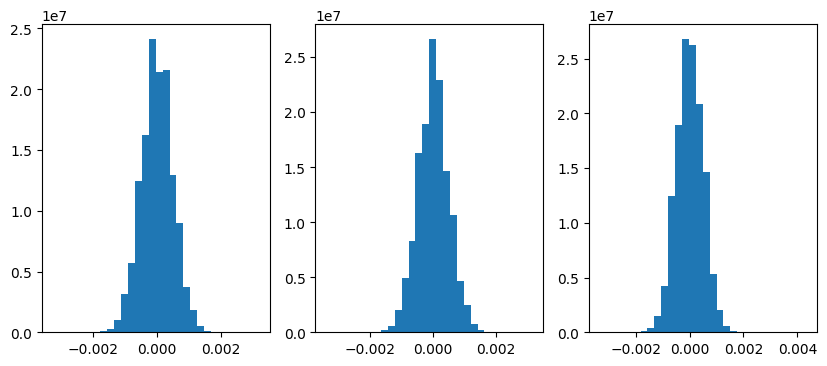

In [72]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [73]:
diff = pos_ics_fromlpt - pos_ics_raword_lagind
diff = (diff + box_size/2) % box_size - box_size/2

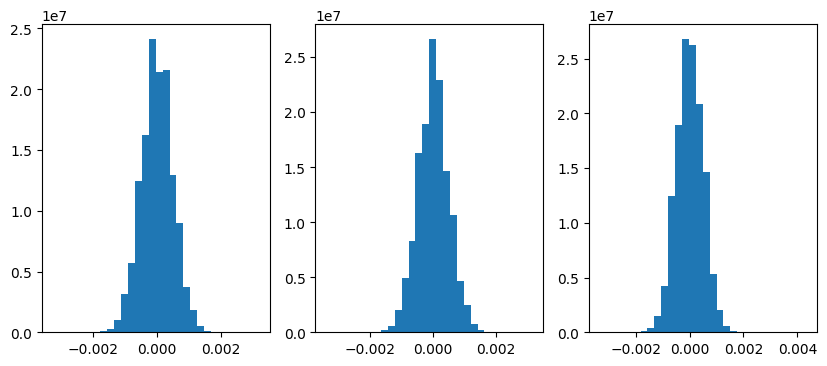

In [74]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [75]:
diff = pos_ics_fromlpt - pos_ics_fromlpt_1lpt
diff = (diff + box_size/2) % box_size - box_size/2

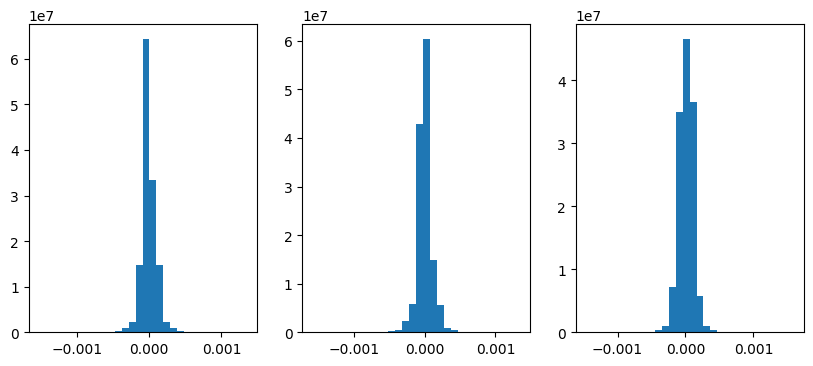

In [76]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [77]:
diff = pos_ics_fromlpt_1lpt - pos_ics_raw_lagind
diff = (diff + box_size/2) % box_size - box_size/2

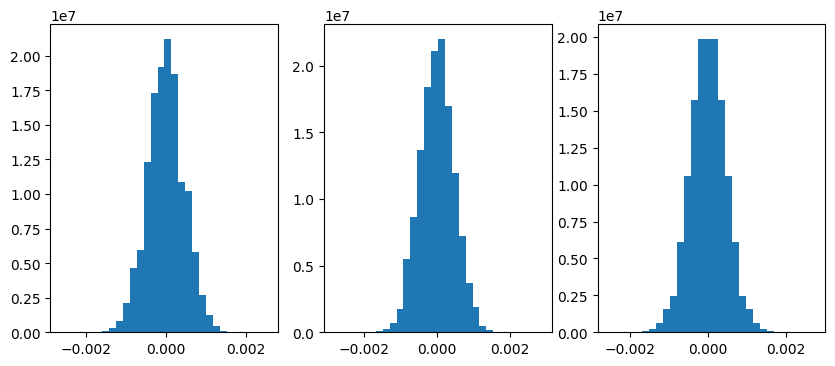

In [78]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [79]:
diff = pos_ics_fromlpt_1lpt - pos_ics_fromlpt_1lpt_damp
diff = (diff + box_size/2) % box_size - box_size/2

In [80]:
np.min(diff), np.max(diff)

(0.0, 0.0)

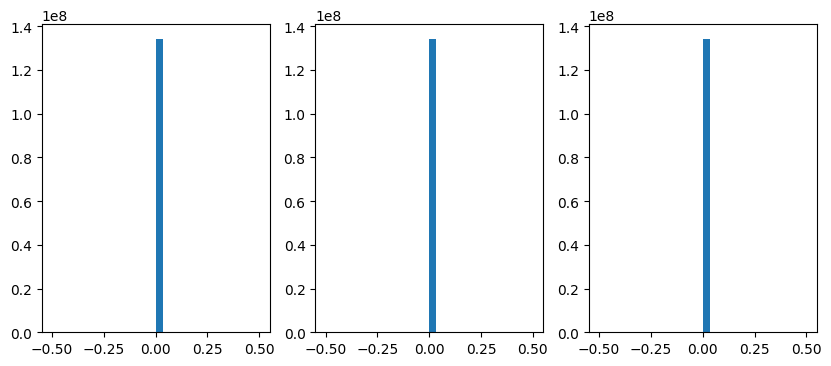

In [81]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [82]:
diff = pos_ics_raw_lagind - pos_ics_raword_lagind
diff = (diff + box_size/2) % box_size - box_size/2

In [83]:
np.allclose(pos_ics_fromlpt, pos_ics_raword_lagind) #???

False

In [84]:
pos_ics_raword_lagind

array([[9.9996179e+02, 1.3692417e-02, 9.9997028e+02],
       [9.9997076e+02, 9.6393675e-03, 1.8972979e+00],
       [9.9997797e+02, 2.9844502e-03, 3.8234291e+00],
       ...,
       [9.9806342e+02, 9.9804645e+02, 9.9406244e+02],
       [9.9805676e+02, 9.9805548e+02, 9.9602008e+02],
       [9.9805273e+02, 9.9807385e+02, 9.9799579e+02]], dtype=float32)

In [85]:
pos_ics_raw_lagind

array([[9.9996179e+02, 1.3692417e-02, 9.9997028e+02],
       [9.9997076e+02, 9.6393675e-03, 1.8972979e+00],
       [9.9997797e+02, 2.9844502e-03, 3.8234291e+00],
       ...,
       [9.9806342e+02, 9.9804645e+02, 9.9406244e+02],
       [9.9805676e+02, 9.9805548e+02, 9.9602008e+02],
       [9.9805273e+02, 9.9807385e+02, 9.9799579e+02]], dtype=float32)

In [86]:
np.min(diff), np.max(diff)

(0.0, 0.0)

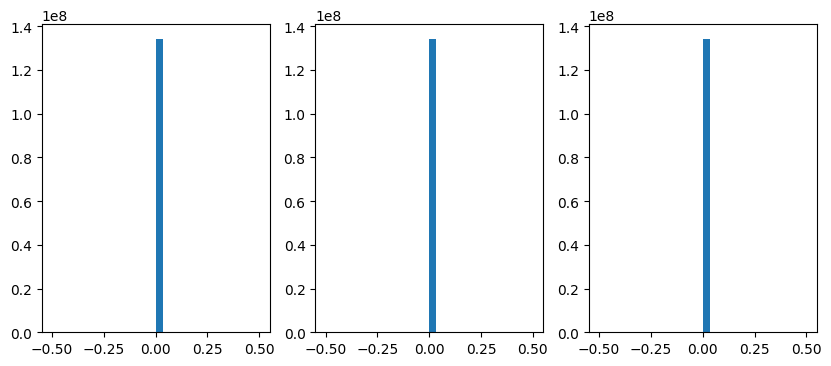

In [87]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(diff[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [88]:
#let's compute the ZA displacement field
q = bacco.visualization.uniform_grid(npix=n_grid, L=sim.header['BoxSize'], ndim=3, bounds=False)

pp_ics = pos_ics_raword_lagind

print(np.min(pp_ics), np.max(pp_ics))
print(np.min(q), np.max(q))

1.08638005e-07 1000.0
0.0 998.0469


In [89]:
disp_za = pp_ics - q.reshape(n_grid**3,3)
disp_za_wrap = (disp_za + box_size/2) % box_size - box_size/2
# disp_za[np.where(disp_za>sim.header['BoxSize']/2.0)]  -= sim.header['BoxSize']
# disp_za[np.where(disp_za<-sim.header['BoxSize']/2.0)] += sim.header['BoxSize']

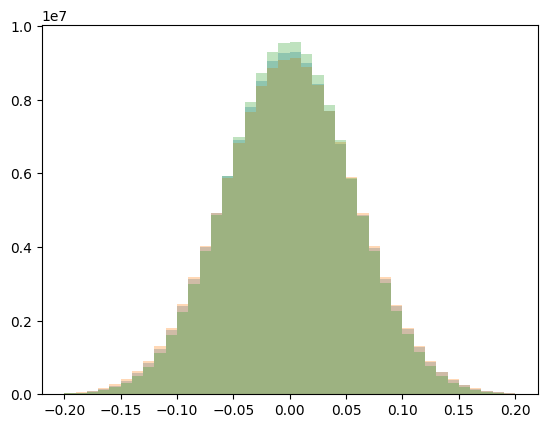

In [90]:
for i in range(3):
    plt.hist(disp_za_wrap[:,i],bins=40, range=[-0.2,0.2], alpha=0.3)

In [91]:
np.min(disp_za_wrap), np.max(disp_za_wrap)

(-0.31207275, 0.31661987)

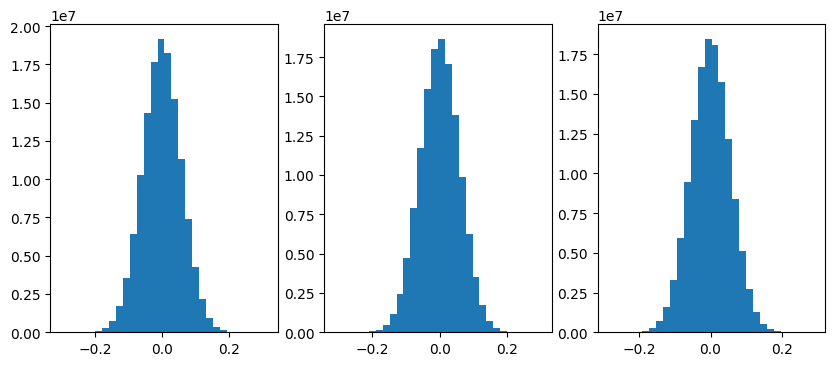

In [92]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
for axis in range(3):
    ax[axis].hist(disp_za_wrap[:,axis],ls=':',#range=[-20,20], 
                  bins=30)

In [93]:
disp_fromlpt_ics.shape, disp_za.shape

((3, 512, 512, 512), (134217728, 3))

In [94]:
sdisp_1lpt = disp_fromlpt_ics_1lpt.reshape(3,n_grid**3).T
print(sdisp_1lpt.shape)
sdisp_2lpt = disp_fromlpt_ics.reshape(3,n_grid**3).T
print(sdisp_2lpt.shape)

(134217728, 3)
(134217728, 3)


In [95]:
im1_1lpt = sdisp_1lpt.reshape(n_grid,n_grid,n_grid,3)
print(im1_1lpt.shape)
im1_2lpt = sdisp_2lpt.reshape(n_grid,n_grid,n_grid,3)
print(im1_2lpt.shape)
im2 = disp_za_wrap.reshape(n_grid,n_grid,n_grid,3)
print(im2.shape)

(512, 512, 512, 3)
(512, 512, 512, 3)
(512, 512, 512, 3)


In [96]:
sdisp_1lpt_taufix = disp_fromlpt_ics_1lpt_taufix.reshape(3,n_grid**3).T
print(sdisp_1lpt_taufix.shape)
im1_1lpt_taufix = sdisp_1lpt_taufix.reshape(n_grid,n_grid,n_grid,3)
print(im1_1lpt_taufix.shape)

(134217728, 3)
(512, 512, 512, 3)


In [97]:
import random
rdm = random.sample(list(np.arange(0,n_grid**3)), 10000)

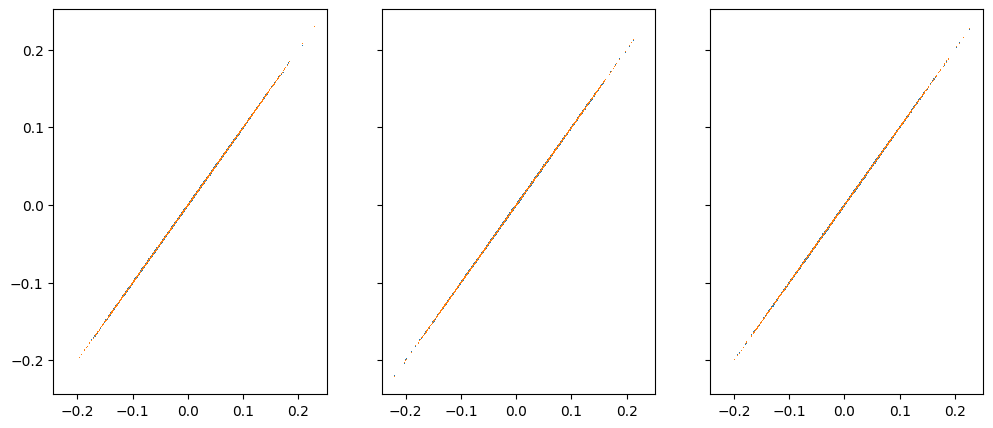

In [98]:
fig, ax = plt.subplots(1,3, figsize=(12,5), sharex=True, sharey=True)
for i in range(3):
 #   ax[i].plot([-0.3,0.3],[-0.3,0.3])
    ax[i].plot(im1_1lpt[...,i].flatten()[rdm], im2[...,i].flatten()[rdm],',')
    ax[i].plot(im1_1lpt[...,i].flatten()[rdm], im1_2lpt[...,i].flatten()[rdm],',')

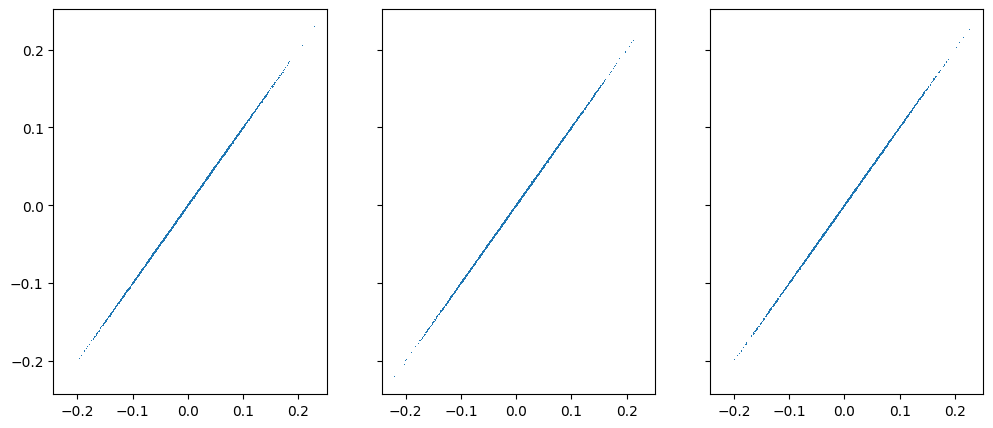

In [99]:
fig, ax = plt.subplots(1,3, figsize=(12,5), sharex=True, sharey=True)
for i in range(3):
 #   ax[i].plot([-0.3,0.3],[-0.3,0.3])
    ax[i].plot(im1_1lpt_taufix[...,i].flatten()[rdm], im2[...,i].flatten()[rdm],',')
    #ax[i].plot(im1_1lpt[...,i].flatten()[rdm], im1_2lpt[...,i].flatten()[rdm],',')

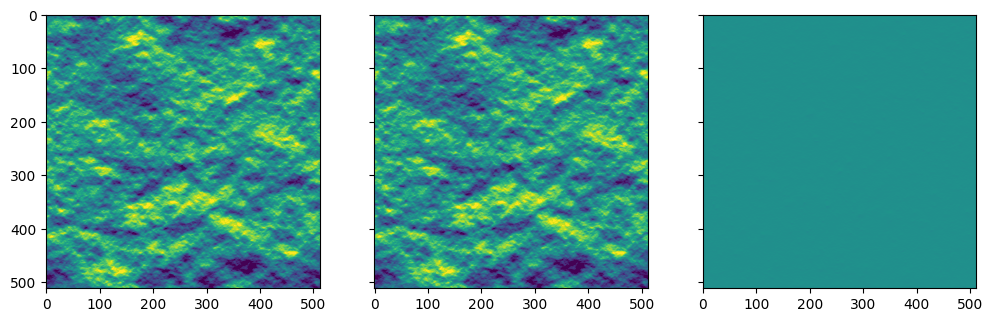

In [100]:
col, axis = 11, 0
fig, ax = plt.subplots(1,3, figsize=(12,5), sharex=True, sharey=True)
ax[0].imshow(im1_1lpt[:,:,col,axis], vmin=-0.15,vmax=0.15)
ax[1].imshow(im2[:,:,col,axis], vmin=-0.15,vmax=0.15)
ax[2].imshow(im2[:,:,col,axis]-im1_1lpt[:,:,col,axis], 
             vmin=-0.015,vmax=0.015
             #vmin=-0.0015,vmax=0.0015
             )

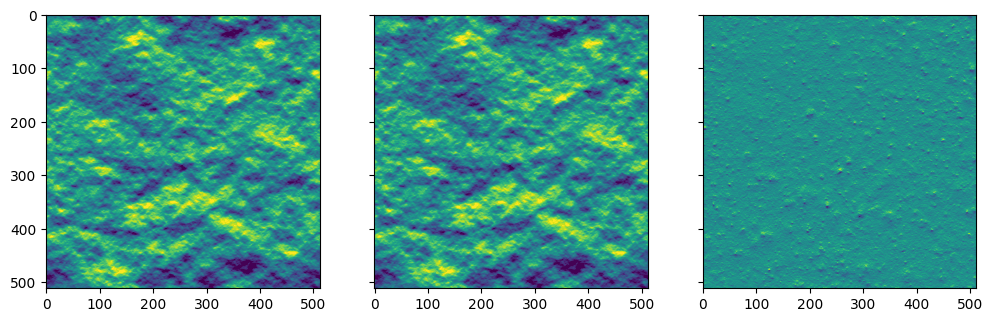

In [101]:
col, axis = 11, 0
fig, ax = plt.subplots(1,3, figsize=(12,5), sharex=True, sharey=True)
ax[0].imshow(im1_2lpt[:,:,col,axis], vmin=-0.15,vmax=0.15)
ax[1].imshow(im2[:,:,col,axis], vmin=-0.15,vmax=0.15)
ax[2].imshow(im2[:,:,col,axis]-im1_2lpt[:,:,col,axis], 
             #vmin=-0.015,vmax=0.015
             vmin=-0.0015,vmax=0.0015
             )

In [102]:
for axis in np.arange(3):
    print("Stdev between BACCO and QUIJOTE's ICs:",np.std(im1_1lpt[...,axis]-im2[...,axis]))
    print("2lpt:",np.std(im1_2lpt[...,axis]-im2[...,axis]))


Stdev between BACCO and QUIJOTE's ICs: 0.00045605912
2lpt: 0.00048744277
Stdev between BACCO and QUIJOTE's ICs: 0.00045760206
2lpt: 0.0004888693
Stdev between BACCO and QUIJOTE's ICs: 0.00045588717
2lpt: 0.0004872535


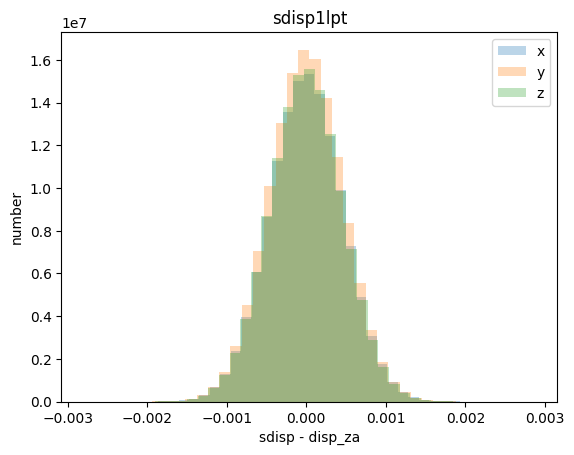

In [103]:
#plt.hist(sdisp_2lpt[:,0]-sdisp[:,0])
plt.title('sdisp1lpt')
myrange = None
#myrange = [-0.01,0.01]
plt.hist(sdisp_1lpt[:,0]-disp_za_wrap[:,0],bins=40, range=myrange, alpha=0.3, label='x')
plt.hist(sdisp_1lpt[:,1]-disp_za_wrap[:,1],bins=40, range=myrange, alpha=0.3, label='y')
plt.hist(sdisp_1lpt[:,2]-disp_za_wrap[:,2],bins=40, range=myrange, alpha=0.3, label='z')
plt.xlabel('sdisp - disp_za')
plt.ylabel('number')
plt.legend()

(array([8.0000000e+00, 2.9000000e+01, 1.3300000e+02, 5.2300000e+02,
        1.9130000e+03, 5.9360000e+03, 1.7144000e+04, 4.6853000e+04,
        1.1926100e+05, 2.8186200e+05, 6.1304000e+05, 1.2371290e+06,
        2.2869340e+06, 3.8847320e+06, 6.0603370e+06, 8.6798730e+06,
        1.1422801e+07, 1.3793590e+07, 1.5297476e+07, 1.5571710e+07,
        1.4569684e+07, 1.2512101e+07, 9.8662410e+06, 7.1489180e+06,
        4.7503000e+06, 2.9004520e+06, 1.6272290e+06, 8.3963500e+05,
        3.9685200e+05, 1.7440700e+05, 7.0398000e+04, 2.6557000e+04,
        9.3530000e+03, 3.0950000e+03, 8.8500000e+02, 2.6100000e+02,
        5.9000000e+01, 1.4000000e+01, 2.0000000e+00, 1.0000000e+00]),
 array([-2.56513804e-03, -2.43163877e-03, -2.29813950e-03, -2.16464000e-03,
        -2.03114073e-03, -1.89764146e-03, -1.76414219e-03, -1.63064280e-03,
        -1.49714353e-03, -1.36364414e-03, -1.23014487e-03, -1.09664560e-03,
        -9.63146216e-04, -8.29646946e-04, -6.96147617e-04, -5.62648289e-04,
        -4.291

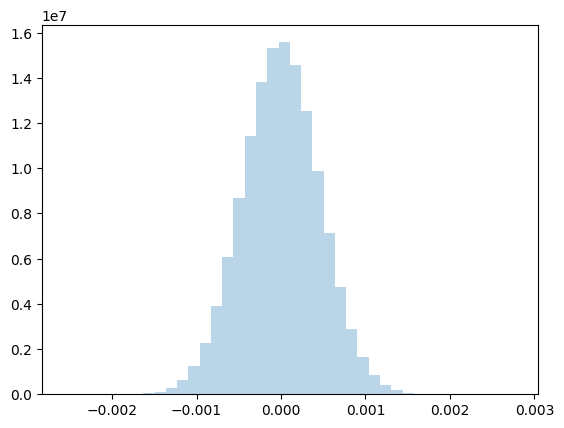

In [104]:
#plt.hist(sdisp_2lpt[:,0]-sdisp[:,0])
#plt.hist(sdisp_1lpt[:,0]-disp_za_wrap[:,0],bins=40, range=[-0.01,0.01], alpha=0.3)
#plt.hist(sdisp_1lpt[:,1]-disp_za_wrap[:,1],bins=40, range=[-0.01,0.01], alpha=0.3)
plt.hist(sdisp_1lpt[:,2]-disp_za_wrap[:,2],bins=40, 
         #range=[-0.01,0.01], 
         alpha=0.3)

Text(0, 0.5, 'number')

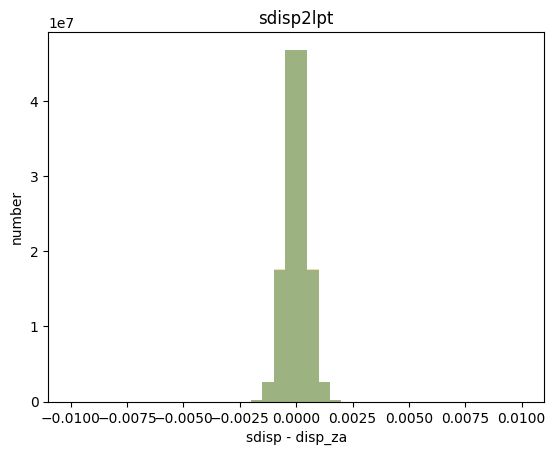

In [105]:
#plt.hist(sdisp_2lpt[:,0]-sdisp[:,0])
plt.title('sdisp2lpt')
plt.hist(sdisp_2lpt[:,0]-disp_za_wrap[:,0],bins=40, range=[-0.01,0.01], alpha=0.3, label='x')
plt.hist(sdisp_2lpt[:,1]-disp_za_wrap[:,1],bins=40, range=[-0.01,0.01], alpha=0.3, label='y')
plt.hist(sdisp_2lpt[:,2]-disp_za_wrap[:,2],bins=40, range=[-0.01,0.01], alpha=0.3, label='z')
plt.xlabel('sdisp - disp_za')
plt.ylabel('number')

In [106]:
ics_mesh_fromlpt = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_ics_fromlpt, 
                                         deposit_method='cic', interlacing=False)
ics_mesh_fromlpt = np.squeeze(ics_mesh_fromlpt)

2024-08-22 18:56:07,454 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-22 18:56:07,457 bacco.statistics : starting deposit 1
2024-08-22 18:56:08,411 bacco.statistics :  mesh done in 0.957 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


In [107]:
ics_mesh_lagind = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_ics_raword_lagind, 
                                         deposit_method='cic', interlacing=False)
ics_mesh_lagind = np.squeeze(ics_mesh_lagind)

2024-08-22 18:56:09,872 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-22 18:56:09,873 bacco.statistics : starting deposit 1
2024-08-22 18:56:10,857 bacco.statistics :  mesh done in 0.985 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


In [108]:
for axis in np.arange(3):
    print("Stdev between BACCO and QUIJOTE's ICs:",np.std(ics_mesh_fromlpt[...,axis]-ics_mesh_lagind[...,axis]))


Stdev between BACCO and QUIJOTE's ICs: 0.000722105
Stdev between BACCO and QUIJOTE's ICs: 0.00070385326
Stdev between BACCO and QUIJOTE's ICs: 0.0007273514


0.8811692 1.1852537
0.8811692 1.1852537
(512, 512, 512)
(512, 512)


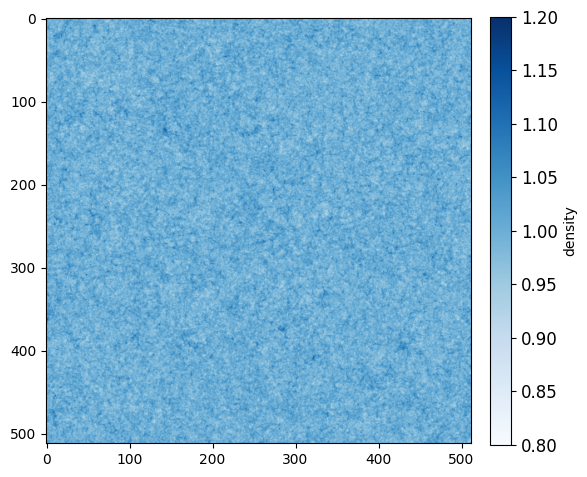

In [109]:
plotter.plot_field(ics_mesh_fromlpt, overdensity=False,
                   vmin=0.8, vmax=1.2)

0.8854248 1.1906669
0.8854248 1.1906669
(512, 512, 512)
(512, 512)


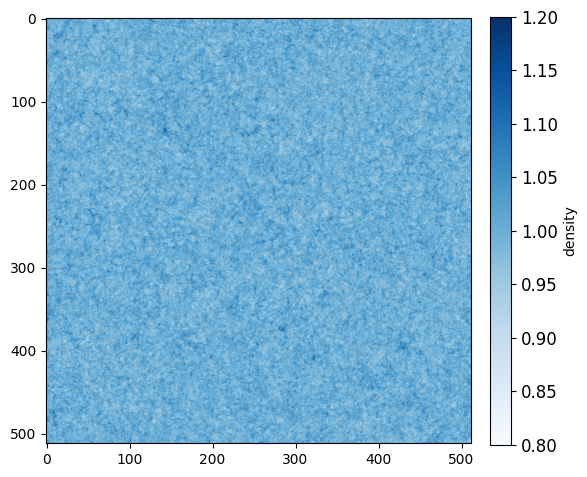

In [110]:
plotter.plot_field(ics_mesh_lagind, overdensity=False,
                   vmin=0.8, vmax=1.2)

-0.0040958524 0.0069271326
-0.0040958524 0.0069271326
(512, 512, 512)
(512, 512)


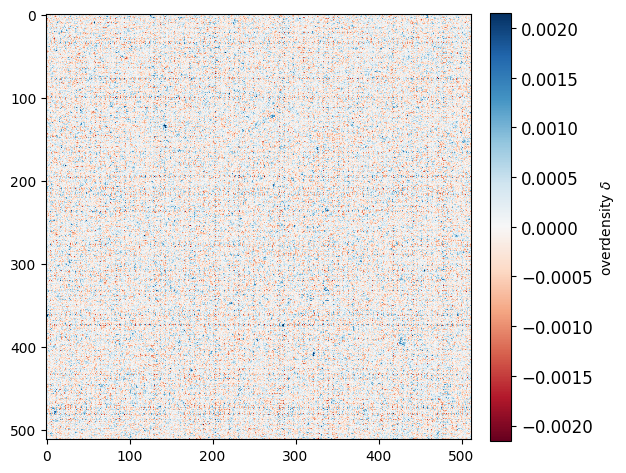

In [111]:
plotter.plot_field(ics_mesh_lagind - ics_mesh_fromlpt, overdensity=True,
                   #vmin=0.8, vmax=1.2
                   )

-0.0041120267 0.0058723018
-0.0041120267 0.0058723018
(512, 512, 512)
(512, 512)


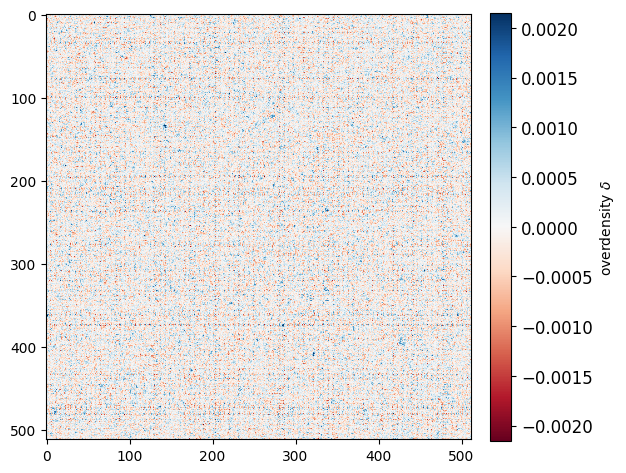

In [112]:
plotter.plot_field((ics_mesh_lagind - ics_mesh_fromlpt)/ics_mesh_fromlpt, overdensity=True,
                   #vmin=0.8, vmax=1.2
                   )

### Use compute_disp function

In [113]:
sdisp_1lpt_computedisp = sim_ics_1lpt.compute_disp_field(ngrid=n_grid, LPT_order=1, damping_scale=1e4).reshape(3,n_grid**3).T


2024-08-22 18:56:25,267 bacco.sims : Generating displacement field: Di=0.009865881875157356


bacco.lss_scaler : 293 P(k) values; Di = (0.009866, 0.000097, -0.000000, 0.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


In [114]:
np.allclose(sdisp_1lpt_computedisp, sdisp_1lpt)

True

In [115]:
sdisp_1lpt_computedisp_xyzlast = sim_ics_1lpt.compute_disp_field(ngrid=n_grid, LPT_order=1, 
                                                                  damping_scale=1e4,
                                                                  xyz_first=False
                                                                  ).reshape(3,n_grid**3).T


2024-08-22 18:56:39,023 bacco.sims : Generating displacement field: Di=0.009865881875157356


bacco.lss_scaler : 293 P(k) values; Di = (0.009866, 0.000097, -0.000000, 0.000000); nthreads =48; seed =663 
bacco.lss_scaler: start computing linear field...
bacco.lss_scaler: seed =663 ngrid=512 pkfixed=0 phase=0.000000, phase_type=1; precision=single 
bacco.lss: computing seed table


In [116]:
sdisp_1lpt_computedisp.shape, sdisp_1lpt_computedisp_xyzlast.shape, sdisp_1lpt.shape

((134217728, 3), (134217728, 3), (134217728, 3))

In [117]:
np.allclose(sdisp_1lpt_computedisp, sdisp_1lpt_computedisp_xyzlast)

False

In [118]:
im1_1lpt_xyzlast = sdisp_1lpt_computedisp_xyzlast.reshape(n_grid,n_grid,n_grid,3)


In [119]:
print(im1_1lpt_xyzlast.shape, im1_1lpt.shape)

(512, 512, 512, 3) (512, 512, 512, 3)


In [120]:
np.allclose(im1_1lpt, im1_1lpt_xyzlast)

False

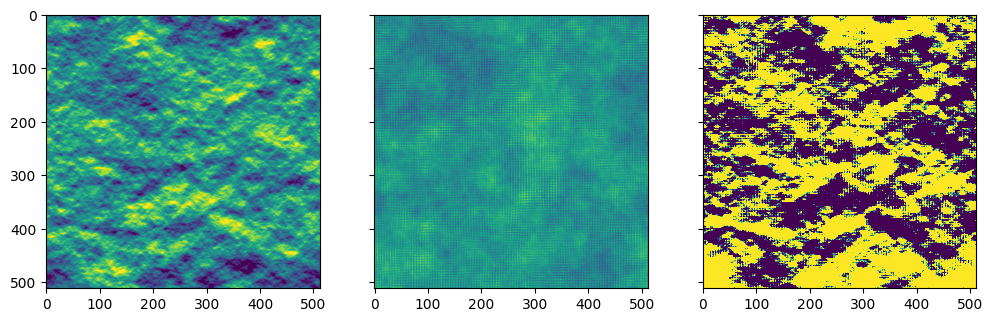

In [121]:
col, axis = 11, 0
fig, ax = plt.subplots(1,3, figsize=(12,5), sharex=True, sharey=True)
ax[0].imshow(im1_1lpt[:,:,col,axis], vmin=-0.15,vmax=0.15)
ax[1].imshow(im1_1lpt_xyzlast[:,:,col,axis], vmin=-0.15,vmax=0.15)
ax[2].imshow(im1_1lpt_xyzlast[:,:,col,axis]-im1_1lpt[:,:,col,axis], 
             vmin=-0.015,vmax=0.015
             #vmin=-0.0015,vmax=0.0015
             )

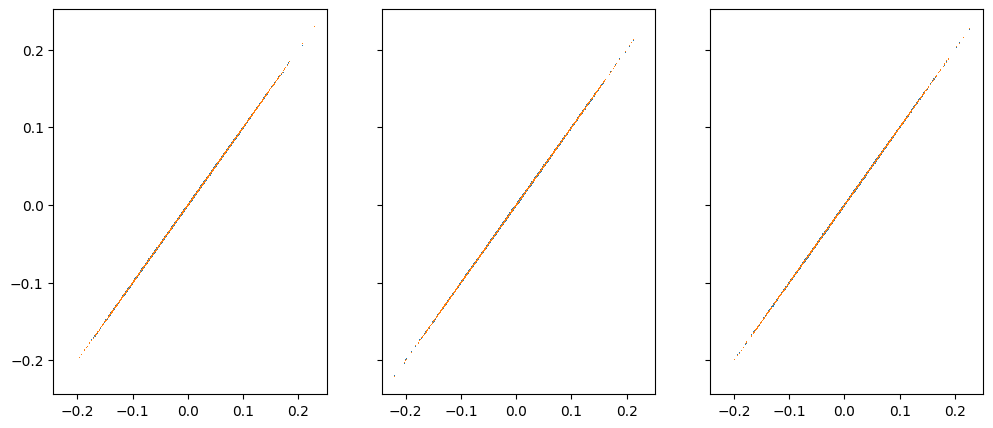

In [122]:
fig, ax = plt.subplots(1,3, figsize=(12,5), sharex=True, sharey=True)
for i in range(3):
 #   ax[i].plot([-0.3,0.3],[-0.3,0.3])
    ax[i].plot(im1_1lpt[...,i].flatten()[rdm], im2[...,i].flatten()[rdm],',')
    ax[i].plot(im1_1lpt[...,i].flatten()[rdm], im1_2lpt[...,i].flatten()[rdm],',')

In [123]:
diff = sdisp_1lpt[:,0]-sdisp_1lpt_computedisp[:,0]
np.min(diff), np.max(diff)

(0.0, 0.0)

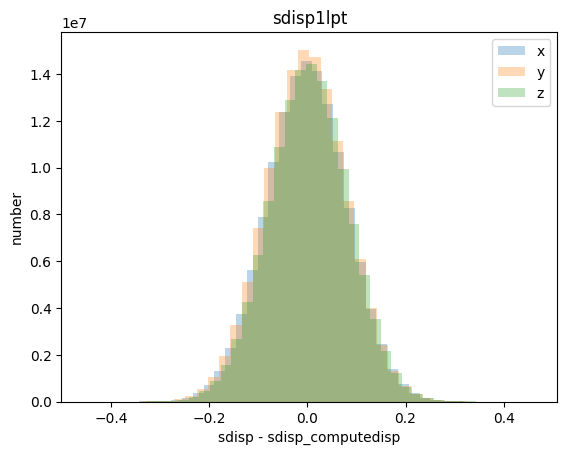

In [124]:
#plt.hist(sdisp_2lpt[:,0]-sdisp[:,0])
plt.title('sdisp1lpt')
myrange = None
#myrange = [-0.01,0.01]
plt.hist(sdisp_1lpt[:,0]-sdisp_1lpt_computedisp_xyzlast[:,0],bins=40, range=myrange, alpha=0.3, label='x')
plt.hist(sdisp_1lpt[:,1]-sdisp_1lpt_computedisp_xyzlast[:,1],bins=40, range=myrange, alpha=0.3, label='y')
plt.hist(sdisp_1lpt[:,2]-sdisp_1lpt_computedisp_xyzlast[:,2],bins=40, range=myrange, alpha=0.3, label='z')
plt.xlabel('sdisp - sdisp_computedisp')
plt.ylabel('number')
plt.legend()

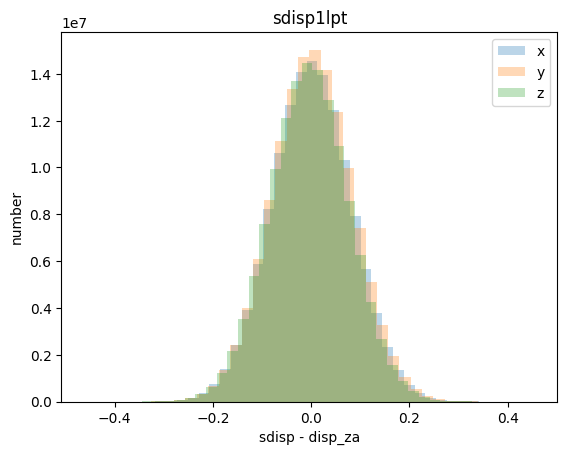

In [125]:
#plt.hist(sdisp_2lpt[:,0]-sdisp[:,0])
plt.title('sdisp1lpt')
myrange = None
#myrange = [-0.01,0.01]
plt.hist(sdisp_1lpt_computedisp_xyzlast[:,0]-disp_za_wrap[:,0],bins=40, range=myrange, alpha=0.3, label='x')
plt.hist(sdisp_1lpt_computedisp_xyzlast[:,1]-disp_za_wrap[:,1],bins=40, range=myrange, alpha=0.3, label='y')
plt.hist(sdisp_1lpt_computedisp_xyzlast[:,2]-disp_za_wrap[:,2],bins=40, range=myrange, alpha=0.3, label='z')
plt.xlabel('sdisp - disp_za')
plt.ylabel('number')
plt.legend()